### 피마인디언 당뇨병 예측
* 보통 당뇨병의 원인은 식습관, 유전으로 꼽음
* 고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만, 20세기 후반 강제 이주정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남
* diabetes 테이터 셋 구조
  + 임신횟수, 포도당부하검사, 혈압, 삼두근피하지방측정값, 인슐린농도,
  + 비만지수, 당뇨내력가중치, 나이, 5년내 당뇨발병여부(0:음성)

In [1]:
# pima-indian 데이타셋을 로지스틱 회귀로 분석한 후 정확도/특이도/재현율(민감도)/F1스코어를 구한후 ROC그래프와 AUC를 확인해보세요
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pima = pd.read_csv('csv/pima-indian.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   blood      768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabete    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
pima.head()

,pregnant,glucose,blood,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.diabete.value_counts()

0    500
1    268
Name: diabete, dtype: int64

In [5]:
data = pima.iloc[:, 0:7]
target = pima.diabete

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, stratify=target, random_state=2111051205)
lrclf = LogisticRegression(max_iter=150)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [7]:
confusion_matrix(pred, ytest)

array([[131,  28],
       [ 19,  53]])

In [8]:
accuracy_score(pred, ytest)   #0.796

0.7965367965367965

In [9]:
precision_score(pred, ytest)  #0.654

0.654320987654321

In [10]:
recall_score(pred, ytest)     #0.736

0.7361111111111112

In [11]:
f1_score(pred, ytest)         #0.692  (!!)

0.6928104575163399

In [12]:
classification_report(pred, ytest)

'              precision    recall  f1-score   support\n\n           0       0.87      0.82      0.85       159\n           1       0.65      0.74      0.69        72\n\n    accuracy                           0.80       231\n   macro avg       0.76      0.78      0.77       231\nweighted avg       0.81      0.80      0.80       231\n'

In [13]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
fprs, tprs, _ = roc_curve(ytest, pred_proba)

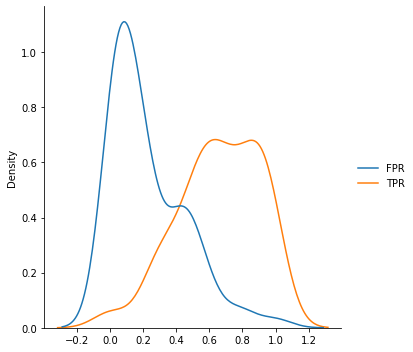

In [14]:
roc = pd.DataFrame({'FPR':fprs, 'TPR':tprs})
sns.displot(roc.iloc[:, [0,1]], kind='kde')

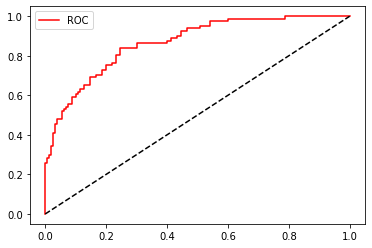

In [15]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1], [0,1], 'k--')
plt.legend()

In [16]:
roc_auc_score(ytest, pred)   # 0.763

0.7638271604938272